In [27]:
import pandas as pd
from scipy import stats
import numpy as np


In [28]:
# Read data 
df_data = pd.read_csv('data_test.csv')

In [29]:
df_data

,0,5,10,15,20,25,30,35,40,45,...,315,320,325,330,335,340,345,350,355,shape
0,175,172,173,181,182,175,178,183,178,174,...,176,182,178,177,175,180,179,173,177,triangle


In [30]:
df_data_data = df_data.iloc[:1,:-1].T

In [31]:
z = stats.zscore(df_data_data, axis=1)

In [32]:
z > 1

,0
0,False
5,False
10,False
15,False
20,False
...,...
335,False
340,False
345,False
350,False


In [33]:
Q1 = df_data_data.quantile(0.25)
Q3 = df_data_data.quantile(0.7)
IQR = Q3 - Q1

# Definieren der Grenzen für Ausreißer
untere_grenze = Q1 - 1.5 * IQR
obere_grenze = Q3 + 1.5 * IQR

In [34]:
df_bereinigt = df_data_data[(df_data_data >= untere_grenze) & (df_data_data <= obere_grenze)]

In [35]:
df_int= df_bereinigt.interpolate().T

In [36]:
df_int.to_csv('data_bereinigt.csv', index=False)

<Axes: >

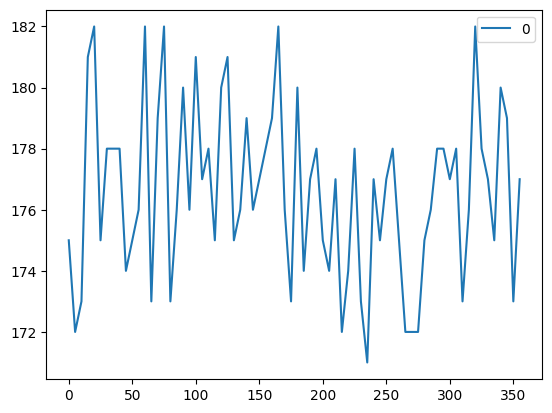

In [37]:
df_int.T.plot()

In [38]:
df_int_trans =df_int.T

<Axes: >

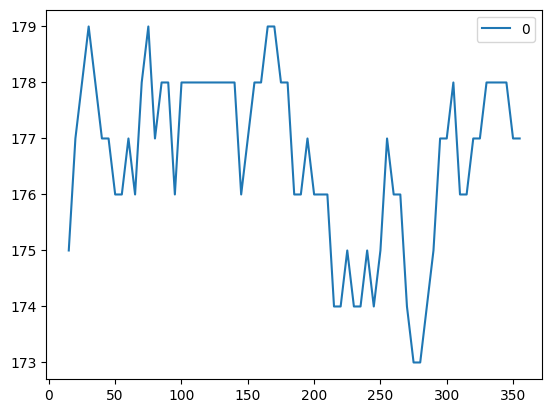

In [39]:
round(df_int_trans.rolling(window = 4).mean()).plot()